In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from tkinter import Tk
import glob
import os

In [32]:
english_words = pd.read_excel("./isitword test/ref/wordorderen_full.xlsx")
thai_words = pd.read_excel("./isitword test/ref/wordorderth_full.xlsx")

# Define function for data preparation

In [33]:
# cleaning df
def cutdf(prepdf):
    cutdf = prepdf.iloc[1:121][["lang","imageid","stimuli","key_resp.keys","key_resp.rt"]].reset_index(drop=True)
    return cutdf

In [34]:
# Score calculation function
def calculate_score(df):
    conditions = [
        (df['key_resp.keys'] == 'z') & (df['stimuli'] == 1),
        (df['key_resp.keys'] == 'x') & (df['stimuli'].isin([2, 3]))
    ]
    values = [1, 1]
    df['score'] = np.select(conditions, values, default=0)
    return df


In [35]:
def convert_stimuli(df):
    stimuli_map = {1: 'Correct', 2: 'Scramble', 3: 'Typo'}
    df['stimuli'] = df['stimuli'].map(stimuli_map)
    return df


In [36]:
# Word length calculation function
def get_word_length(df, words_df):
    word_length_dict = words_df.set_index('imageid')['word shown'].astype(str).apply(len).to_dict()
    df['word_length'] = df['imageid'].map(word_length_dict)
    df['word_shown'] = words_df["word shown"]
    return df


# getting all subject files and clean as usual

In [37]:

import glob
import os

path = './data/isitword test - data/'
all_files = glob.glob(os.path.join(path , "*.csv"))

normlist, normthlist, normenlist = [], [], []

for filename in all_files:
    user_lang_list = filename.split('_M')[0].split('- data\\')[1].split('_')
    username = user_lang_list[0]
    lang = user_lang_list[1]

    df = pd.read_csv(filename, index_col=None, header=0)
    df = cutdf(df)
    df = calculate_score(df)
    df = convert_stimuli(df)
    if df['lang'].mean() == 1:
        df = get_word_length(df, thai_words)
        normthlist.append(df)
    elif df['lang'].mean() == 2:
        df = get_word_length(df, english_words)
        normenlist.append(df)
    else:
        print("data file corrupted, please check manually at:", filename)
        break
    
    df['username'] = username

    normlist.append(df)

if len(normlist) == len(normenlist) + len(normthlist) and len(normenlist) == len(normthlist):
    n_subj = len(normenlist)
    print("validity = OK!")
else:
    print("caution,",len(normlist),"lists discrepancy compared to", len(normenlist),"and", len(normthlist) )

validity = OK!


# read patient file and clean as usual

In [38]:


patientpath = "./data/patient isitword test/"
all_patientfiles = glob.glob(os.path.join(patientpath , "*.csv"))

ptth = pd.read_csv(all_patientfiles[1])
pten = pd.read_csv(all_patientfiles[0])

def tenderizer(df):
    cut_df = cutdf(df)
    cut_df = calculate_score(cut_df)
    cut_df = convert_stimuli(cut_df)
    return cut_df

ptth = tenderizer(ptth)
pten = tenderizer(pten)
get_word_length(ptth, thai_words)
get_word_length(pten, english_words)

,lang,imageid,stimuli,key_resp.keys,key_resp.rt,score,word_length,word_shown
0,2.0,66.0,Correct,x,1.555736,0,6,eraser
1,2.0,3.0,Correct,z,1.549111,1,3,cat
2,2.0,71.0,Scramble,x,1.214173,1,6,kiooce
3,2.0,27.0,Typo,x,18.486560,1,4,coot
4,2.0,88.0,Typo,x,3.009636,1,7,podlana
...,...,...,...,...,...,...,...,...
115,2.0,10.0,Correct,z,4.582554,1,3,bat
116,2.0,8.0,Typo,x,10.083734,1,3,sus
117,2.0,94.0,Typo,x,25.776865,1,7,giandto
118,2.0,11.0,Scramble,x,8.610546,1,3,jgu


# Remove unknown word for patient and everyone 

In [39]:
# List of words to exclude
exclude_words = ["pear", "hose", "drill", "couch"]

# Filter English patient dataset
def remove_unknown(df, list):
    filtered_df = df[~df['word_shown'].isin(list)]
    return filtered_df

pten_f = remove_unknown(pten, exclude_words)

# Filter English normal dataset
normenlist_f = []
for i in normenlist:
    df = remove_unknown(i, exclude_words)
    normenlist_f.append(df)



# combine dataframe for calculating overall mean or whatever I want to

In [40]:
ptall = pd.concat([ptth, pten_f], ignore_index=True)
normen = pd.concat([i for i in normenlist_f], ignore_index=True)
normth = pd.concat([i for i in normthlist], ignore_index=True)
normall = pd.concat([normth, normen], ignore_index=True)

# Function to plot graphs
def save_plot(title):
    file_path = f"./figure/norm/II {title}.png"
    plt.savefig(file_path, dpi=300, bbox_inches='tight')

# Coloring variable
caution: color are not finalized!

In [41]:
redgradient = ["#ffa5bb","#ff9eb6", "#ff7d9d", "#ff6087","#ff0040" ] # thai language, use the last index value as the main color
bluegradient = ["#c0d7ff", "#92bcff", "#5e9eff","#3686ff","#0067ff" ] # english language, use the last index value as the main color
gaygradient = ["#949494", '#727272', '#4b4b4b', '#484848', '#373737'] # overall gradient
colincorrect = '#ff6962'
colcorrect  = '#77dd76'
patient = '#fc6600'

# ALL CODES BELOW GENERATE GRAPH

notice: `normen, normth, normall` for dataframe that combined everyone, `normenlist_f, normthlist` is a list that contains dataframe separated by user

`ptth` and `pten_f` and `ptall` for patient data



## _dupe removal_


In [42]:
def legend_unique(prop = None):
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))  # Removes duplicates
    plt.legend(unique_labels.values(), unique_labels.keys(), prop = prop)

## %correct vs lang

username         DM    GSR          KH          NU         PH         PM  \
lang                                                                       
1.0       96.666667  100.0  100.000000  100.000000  99.166667  98.333333   
2.0       93.162393  100.0   96.581197   99.145299  95.726496  98.290598   

username         PT         SC  
lang                            
1.0       97.500000  97.500000  
2.0       95.726496  97.435897  


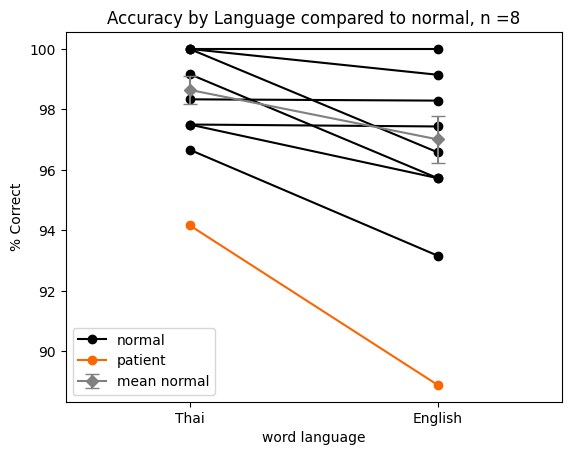

In [43]:
# Plot percentage correct per language

normalaccu = normall.groupby(['lang', 'username'])['score'].mean().mul(100).unstack()
print(normalaccu)
for i, (ind, series) in enumerate(normalaccu.items()):
    plt.plot(series.index, series.values, color = 'black', marker = 'o', label = 'normal')

#plt.scatter([1]*8 + [2]*8, [normalaccuth.values] + [normalaccuen.values], color = 'black', label = 'normal')

# calculate list of mean first for each language
thmean = normth.groupby(['username'])['score'].mean().mul(100)
enmean = normen.groupby(['username'])['score'].mean().mul(100)
plt.errorbar([1,2], [normth['score'].mean() *100, normen['score'].mean() *100], yerr = [thmean.sem(), enmean.sem()] , color = 'gray', marker = 'D', capsize = 5, label = 'mean normal')

plt.plot([1,2], [ptth['score'].mean() * 100, pten_f['score'].mean() * 100],  color = patient,marker = 'o', label = "patient")

plt.ylabel("% Correct")
plt.xlabel("word language")
plt.xticks([1,2], ["Thai", "English"])
plt.title(f"Accuracy by Language compared to normal, n ={n_subj}")

# save_plot("percentage correct by language")
plt.margins(x=0.5)
legend_unique()
plt.savefig("./figure/norm/II norm accu by lang.png")


%correct vs length

In [44]:
"{:.120f}".format(1.5+3.1)


'4.599999999999999644728632119949907064437866210937500000000000000000000000000000000000000000000000000000000000000000000000'

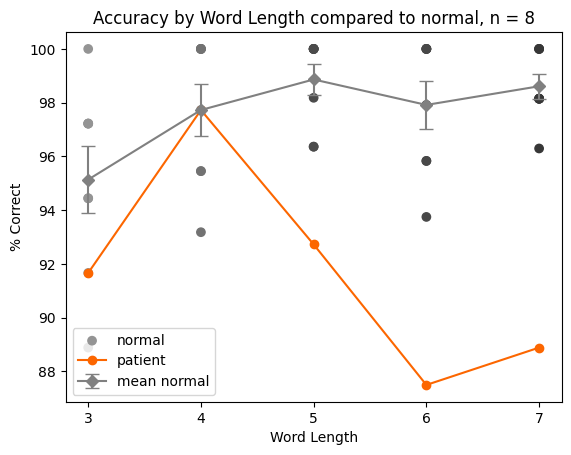

In [45]:
# Word length vs % correct

# all data by user
norm_df = normall.groupby(['username', 'word_length'])['score'].mean().mul(100).unstack()
for i, (user, accubylen) in enumerate(norm_df.iterrows()):

    plt.scatter(accubylen.index, accubylen.values, label = 'normal', color = gaygradient, marker = 'o')

e = []
for i in norm_df.columns:
    e.append(norm_df[i].sem())

# mean of all user
mean_df = normall.groupby('word_length')['score'].mean() * 100
sem_df = normall.groupby('word_length')['score'].sem() *100

x = mean_df.index
y = mean_df.values

plt.errorbar(x, y, yerr = e, color = "gray", marker =  'D', capsize = 5, label = 'mean normal')

# for i in range(len(x)):
#     plt.text(x[i], y[i]+1, round(y[i], 2), ha = 'center')

# patient
patientmean_df = ptall.groupby('word_length')['score'].mean().mul(100)

plt.plot(patientmean_df.index, patientmean_df.values, marker = 'o',color = patient, label = 'patient')


# Labels and title
plt.ylabel("% Correct")
plt.xlabel("Word Length")
plt.title(f"Accuracy by Word Length compared to normal, n = {n_subj}")


plt.xticks(x)
legend_unique()
plt.savefig("./figure/norm/II norm accu by wordlen.png")


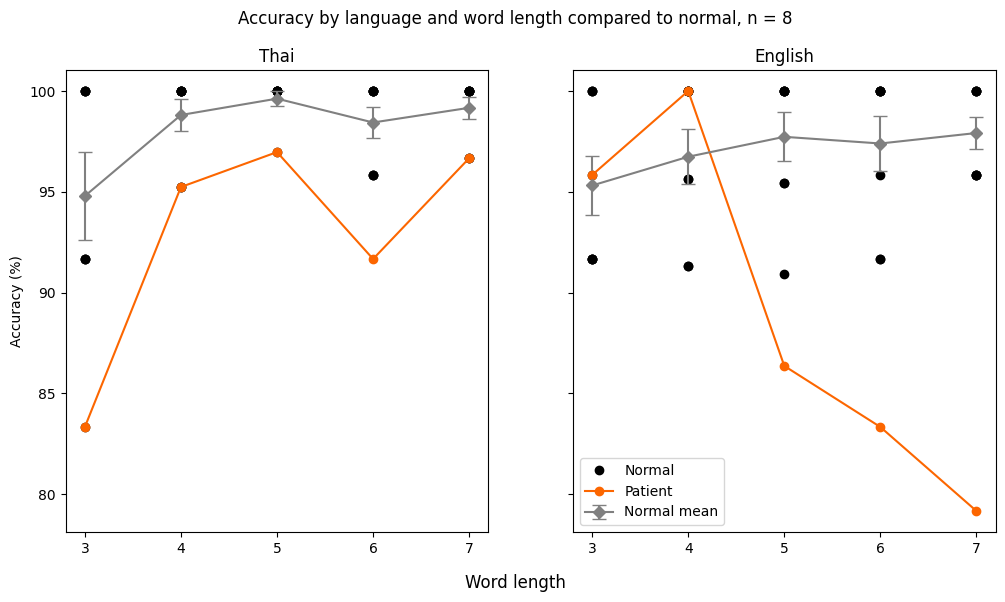

In [46]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth, ptth] , [normen, pten_f]]
for i in [0,1]:

    d = lister[i][0].groupby(['word_length', 'username'])['score'].mean().mul(100).unstack()
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', linestyle = '', label = 'Normal')

    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = 'gray', capsize = 5, label = 'Normal mean')
    p = lister[i][1].groupby(['word_length'])['score'].mean().mul(100)
    s = lister[i][1].groupby(['word_length'])['score'].sem().mul(100)
    axs[i].plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Accuracy by language and word length compared to normal, n = {n_subj}")
fig.supxlabel("Word length")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("Thai")
axs[1].set_title("English")
axs[0].set_xticks([3,4,5,6,7])
axs[1].set_xticks([3,4,5,6,7])
legend_unique()

plt.savefig("./figure/norm/II norm accu by wordlen and lang.png")


%correct vs stimuli

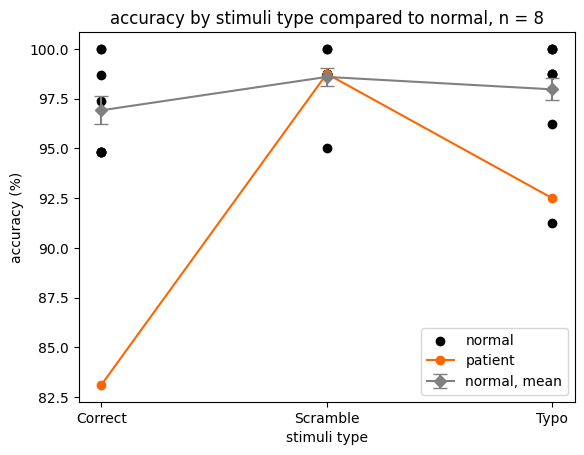

In [47]:
custom_ord = ["Correct", "Scramble", "Typo"]
# normal
normmean = normall.groupby(['stimuli', 'username'])['score'].mean().mul(100).unstack()
normmean = normmean.reindex(custom_ord, level='stimuli')
for ind, ser in normmean.items():
    plt.scatter(ser.index, ser.values, color = 'black', label = 'normal')

# normal mean
normmean = normall.groupby('stimuli')['score'].mean().mul(100)
normsem = normall.groupby('stimuli')['score'].sem().mul(100)

plt.errorbar(normmean.index, normmean.values, yerr = normsem.values, color = 'gray', marker = 'D', capsize = 5 , label = 'normal, mean')

# patient
ptmean = ptall.groupby('stimuli')['score'].mean().mul(100)
plt.plot(ptmean.index, ptmean.values, color = patient, marker = 'o',label = 'patient')
plt.title(f"accuracy by stimuli type compared to normal, n = {n_subj}")
plt.ylabel("accuracy (%)")
plt.xlabel("stimuli type")
legend_unique()

plt.savefig("./figure/norm/II norm accu by stimuli.png")


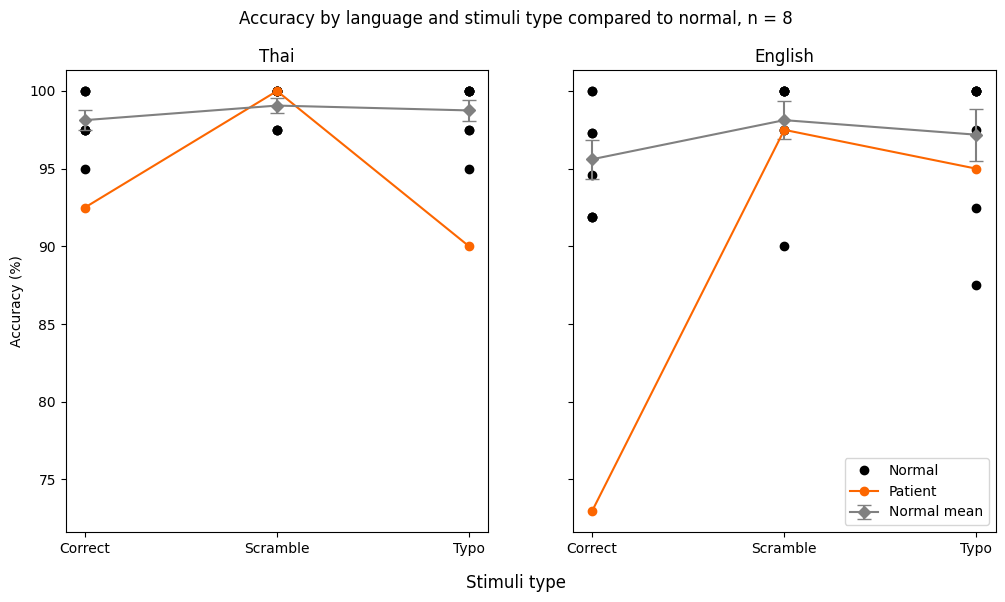

In [48]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth, ptth] , [normen, pten_f]]
for i in [0,1]:

    d = lister[i][0].groupby(['stimuli', 'username'])['score'].mean().mul(100).unstack()
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', linestyle = '', label = 'Normal')

    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = 'gray', capsize = 5, label = 'Normal mean')
    p = lister[i][1].groupby(['stimuli'])['score'].mean().mul(100)
    s = lister[i][1].groupby(['stimuli'])['score'].sem().mul(100)
    axs[i].plot(p.index, p.values, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Accuracy by language and stimuli type compared to normal, n = {n_subj}")
fig.supxlabel("Stimuli type")
axs[0].set_ylabel("Accuracy (%)")
axs[0].set_title("Thai")
axs[1].set_title("English")
# axs[0].set_xticks([3,4,5,6,7])
# axs[1].set_xticks([3,4,5,6,7])
legend_unique()

plt.savefig("./figure/norm/II norm accu by stimuli and lang.png")


# Reactime vs lang

In [49]:
# filter onlt correct reaction time
normall_filter = normall[normall['score'] == 1]
normth_filter = normth[normth['score'] == 1]
normen_filter = normen[normen['score'] == 1]
ptall_filter = ptall[ptall['score'] == 1]
pten_filter = pten_f[pten_f['score'] == 1]
ptth_filter = ptth[ptth['score'] == 1]

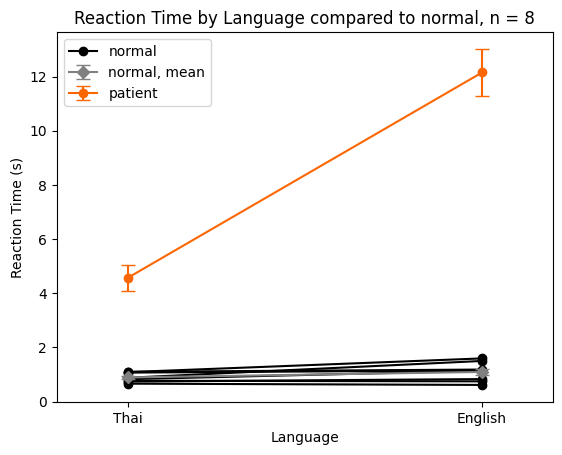

In [50]:
# normal
normmean = normall_filter.groupby(['lang','username'])['key_resp.rt'].mean().unstack()
for ind, ser in normmean.items():
    plt.plot(ser.index, ser.values, marker = 'o', color = 'black', label = 'normal')

# normal mean
mean = normmean.T.mean()
sem = normmean.T.sem()
plt.errorbar(mean.index, mean.values, yerr = sem.values, color = 'gray', marker = 'D', capsize = 5 , label = 'normal, mean')

# patient
mean = ptall.groupby('lang')['key_resp.rt'].mean()
sem = ptall.groupby('lang')['key_resp.rt'].sem()
plt.errorbar(mean.index, mean.values, yerr = sem.values, color = patient, marker = 'o', capsize = 5 , label = 'patient')
plt.ylabel("Reaction Time (s)")
plt.title(f"Reaction Time by Language compared to normal, n = {n_subj}" )
plt.xlabel('Language')
plt.xticks([1,2], ["Thai", "English"])

# save_plot( "reaction time by language")
plt.margins(x=0.2)
legend_unique()
plt.savefig("./figure/norm/II norm RT by lang.png")

Freedman-Diaconis Rule AND Create BOX plot AND Histogram

In [51]:
import matplotlib.font_manager as fm
thai_font_path="./THSarabun.ttf"
def II_plot_RT_outliers(df, lang, title,  ylim = None,save_path=None):
    RT = 'key_resp.rt'
    # Calculate outlier thresholds using IQR method
    # Q1 = df[RT].quantile(0.25)
    # Q3 = df[RT].quantile(0.75)
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR

    # # Find outliers
    # outliers = df[(df[RT] < lower_bound) | (df[RT] > upper_bound)]
    # outliers.sort_values(by=[RT], inplace = True)

    # Create the plot
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 3]})

    # Boxplot (Top)
    sns.boxplot(data=df, x=RT, ax=axes[0], color='lightgray')
    axes[0].set_title(title)
    axes[0].set_xlabel('')
    axes[0].set_xlim(0,20)
#     # Annotate outliers with the corresponding 'word shown' using the Thai font if provided
#     prop = fm.FontProperties(fname=thai_font_path)
#     i = 0
#     for outlier_value, word in zip(outliers[RT], outliers['word shown']):
#         yax = 0 + 0.25 * ((-1) ** i)
#         axes[0].text(outlier_value, yax, word, fontsize=10, ha='center', va = 'center',color='black', fontweight='light', rotation=90, fontproperties=prop)
#         i = i + 1
# # 
    # axes[0].set_yticks([])  # Hide y-axis ticks
    # axes[0].set_xlabel("")  # Remove x-axis label

    # Histogram (Bottom)

    num_bins = 20
    colorchoice = bluegradient[4] if lang == 'th' else redgradient[4] if lang == 'en' else gaygradient[4] 
    axes[1].hist(df[RT], bins=num_bins,range = (0,20) ,color=colorchoice, alpha=0.7, edgecolor='black')
    axes[1].set_title('')
    axes[1].set_xlabel("Reaction Time (s)")
    axes[1].set_ylabel("Frequency")
    # axes[1].set_xticks(np.arange(0,16,1))
    axes[1].set_xlim(0,20)
    if ylim != None:
        axes[1].set_ylim(0,ylim)




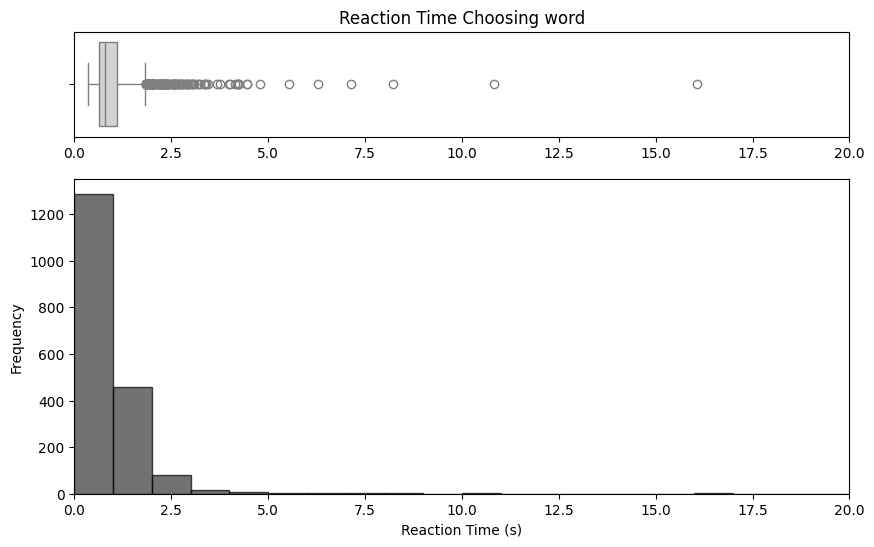

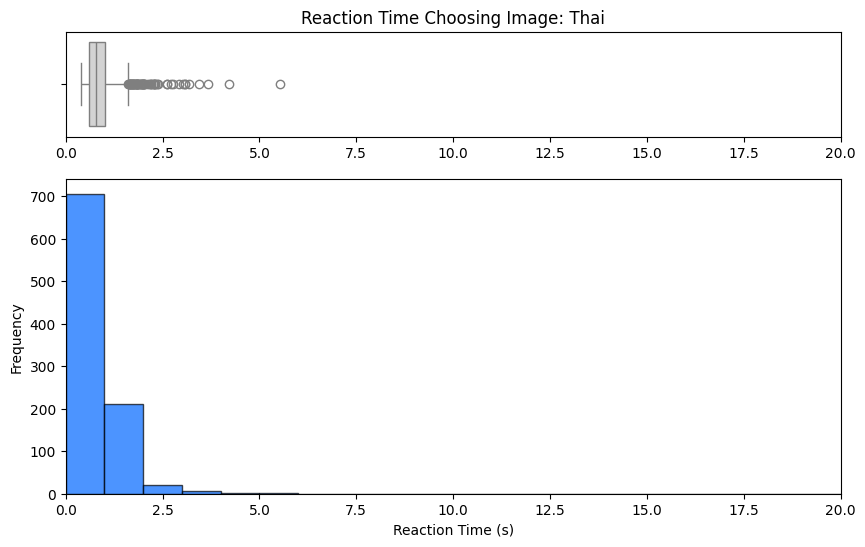

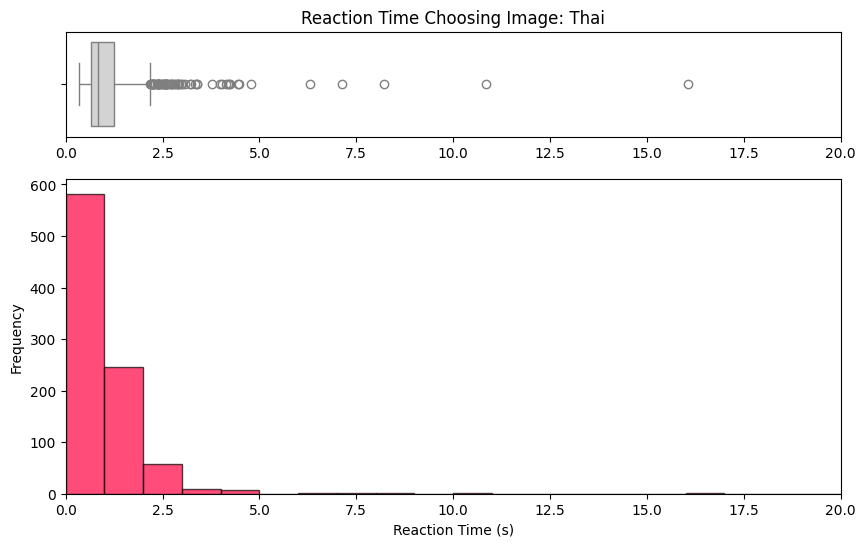

In [52]:
II_plot_RT_outliers(normall_filter, '',"Reaction Time Choosing word")
II_plot_RT_outliers(normall_filter[normall_filter['lang'] == 1], 'th',"Reaction Time Choosing Image: Thai")
II_plot_RT_outliers(normall_filter[normall_filter['lang'] == 2], 'en',"Reaction Time Choosing Image: Thai")
# II_plot_RT_outliers(datafilter[datafilter['Language'] == 'English'], 'en',"Reaction Time Choosing Image: English", ylim=60)

Language VS Reaction Time Histogram

# Word Length vs Reaction Time Graphs

word_length
3    0.105877
4    0.078371
5    0.078275
6    0.105366
7    0.092968
dtype: float64
word_length
3    5.904578
4    8.326871
5    6.682642
6    9.862315
7    9.182622
Name: key_resp.rt, dtype: float64


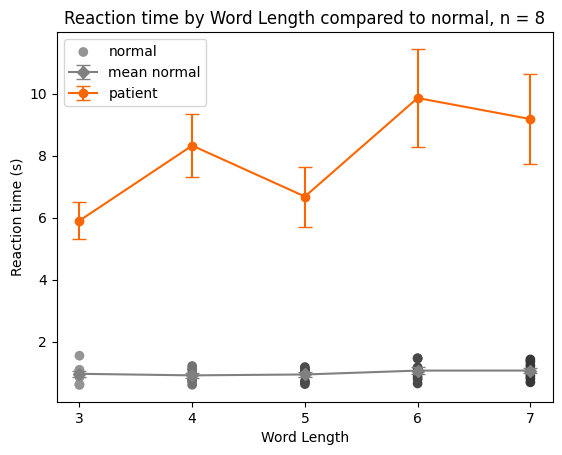

In [53]:
# norm
norm_df = normall_filter.groupby(['word_length', 'username'])['key_resp.rt'].mean().unstack()
sem_df = norm_df.T.sem()

for i, (user, accubylen) in enumerate(norm_df.items()):
    plt.scatter(accubylen.index, accubylen.values, label = 'normal', color = gaygradient, marker = 'o')

# mean of all user
mean_df = normall_filter.groupby('word_length')['key_resp.rt'].mean()

print(sem_df)
x = mean_df.index
y = mean_df.values
e = sem_df.values
plt.errorbar(x, y, yerr = e, color = "gray", marker =  'D', capsize = 5, label = 'mean normal')

# patient
patientmean_df = ptall_filter.groupby('word_length')['key_resp.rt'].mean()
sem = ptall_filter.groupby('word_length')['key_resp.rt'].sem()
print(patientmean_df)

plt.errorbar(patientmean_df.index, patientmean_df.values, yerr = sem.values, marker = 'o', capsize= 5, color = patient, label = 'patient')


# Labels and title
plt.ylabel("Reaction time (s)")
plt.xlabel("Word Length")
plt.title(f"Reaction time by Word Length compared to normal, n = {n_subj}")

plt.xticks(x)
legend_unique()
plt.savefig("./figure/norm/II norm RT by wordlen.png")

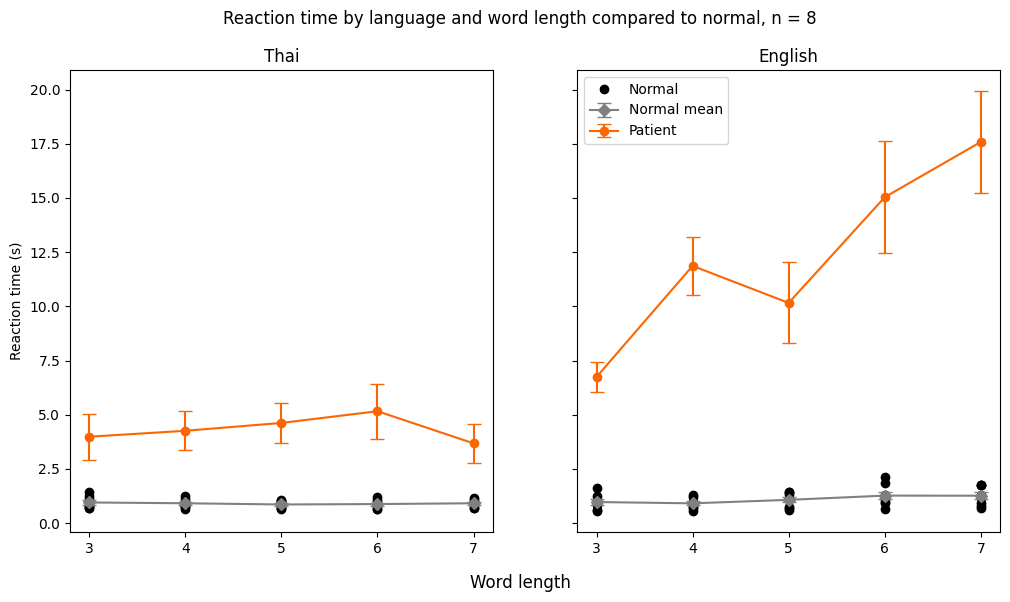

In [59]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth_filter, ptth_filter] , [normen_filter, pten_filter]]
for i in [0,1]:

    d = lister[i][0].groupby(['word_length', 'username'])['key_resp.rt'].mean().unstack()
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', linestyle = '', label = 'Normal')

    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = 'gray', capsize = 5, label = 'Normal mean')
    p = lister[i][1].groupby(['word_length'])['key_resp.rt'].mean()
    s = lister[i][1].groupby(['word_length'])['key_resp.rt'].sem()
    axs[i].errorbar(p.index, p.values, yerr = s.values, capsize = 5, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Reaction time by language and word length compared to normal, n = {n_subj}")
fig.supxlabel("Word length")
axs[0].set_ylabel("Reaction time (s)")
axs[0].set_title("Thai")
axs[1].set_title("English")
axs[0].set_xticks([3,4,5,6,7])
axs[1].set_xticks([3,4,5,6,7])
legend_unique()

plt.savefig("./figure/norm/II norm RT by wordlen and lang.png")


# Stimuli Type vs Reaction Time Graphs

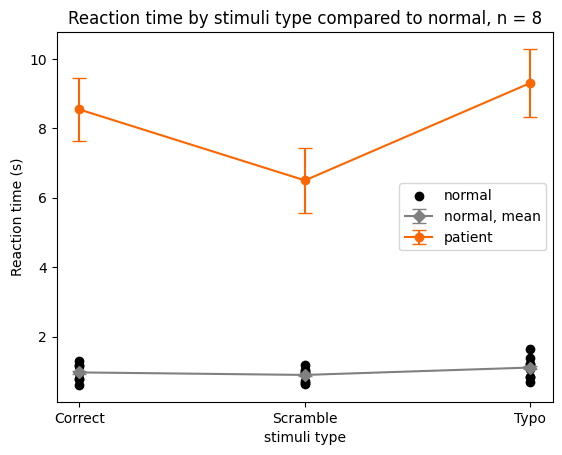

In [55]:
custom_ord = ["Correct", "Scramble", "Typo"]
# normal
normmean = normall_filter.groupby(['stimuli', 'username'])['key_resp.rt'].mean().unstack()
normmean = normmean.reindex(custom_ord, level='stimuli')
for ind, ser in normmean.items():
    plt.scatter(ser.index, ser.values, color = 'black', label = 'normal')

# normal mean
normmean = normall_filter.groupby('stimuli')['key_resp.rt'].mean()
normsem = normall_filter.groupby('stimuli')['key_resp.rt'].sem()

plt.errorbar(normmean.index, normmean.values, yerr = normsem.values, color = 'gray', marker = 'D', capsize = 5, label = 'normal, mean')

# patient
ptmean = ptall_filter.groupby('stimuli')['key_resp.rt'].mean()
ptsem = ptall_filter.groupby('stimuli')['key_resp.rt'].sem()

plt.errorbar(ptmean.index, ptmean.values,yerr = ptsem.values,  marker = 'o', capsize= 5, color = patient, label = 'patient')
plt.title(f"Reaction time by stimuli type compared to normal, n = {n_subj}")
plt.ylabel("Reaction time (s)")
plt.xlabel("stimuli type")
legend_unique()
plt.savefig("./figure/norm/II norm RT by stimuli.png")

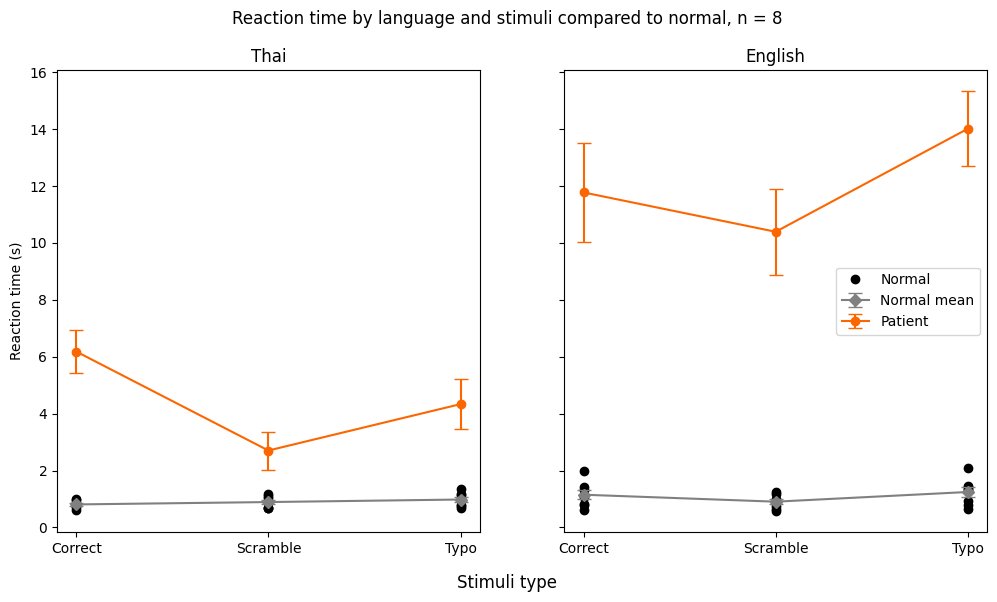

In [56]:
fig, axs = plt.subplots(1, 2, figsize = (12,6), sharey=True)
lister = [[normth_filter, ptth_filter] , [normen_filter, pten_filter]]
for i in [0,1]:

    d = lister[i][0].groupby(['stimuli', 'username'])['key_resp.rt'].mean().unstack()
    for s, v in d.items():
        axs[i].plot(v.index, v.values, color = 'black', marker = 'o', linestyle = '', label = 'Normal')

    mean, sem = d.T.mean(), d.T.sem()
    axs[i].errorbar(mean.index, mean.values, yerr = sem.values, marker = 'D', color = 'gray', capsize = 5, label = 'Normal mean')
    p = lister[i][1].groupby(['stimuli'])['key_resp.rt'].mean()
    s = lister[i][1].groupby(['stimuli'])['key_resp.rt'].sem()
    axs[i].errorbar(p.index, p.values, yerr = s.values, capsize = 5, color = patient, label = "Patient", marker = 'o')

fig.suptitle(f"Reaction time by language and stimuli compared to normal, n = {n_subj}")
fig.supxlabel("Stimuli type")
axs[0].set_ylabel("Reaction time (s)")
axs[0].set_title("Thai")
axs[1].set_title("English")

legend_unique()

plt.savefig("./figure/norm/II norm RT by stimuli and lang.png")
